<a href="https://colab.research.google.com/github/ajaythakur3369/Code-Casa-Internship/blob/main/Stock_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Stock Price Predictor**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - Code Casa**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/Code-Casa-Internship)**

# **Problem Statement -**

Stock price prediction is a machine learning project that learns about the performance of a company and predicts future stock prices. The challenges include working with granular data and different types of data. One advantage is that the financial markets have shorter feedback cycles. To begin, you can start with a simple machine learning problem such as predicting 6-month price movements based on fundamental indicators. You can download stock market datasets.

# **Let's Begin !**

In [ ]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import warnings
warnings.filterwarnings('ignore')

**Data Preprocessing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab_Notebook/Internship_Name/Code_Casa/File_Name/Stock_price_dataset.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1617 non-null   datetime64[ns]
 1   Open       1617 non-null   float64       
 2   High       1617 non-null   float64       
 3   Low        1617 non-null   float64       
 4   Close      1617 non-null   float64       
 5   Adj Close  1617 non-null   float64       
 6   Volume     1617 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 88.6 KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,109.000000,110.000000,105.209999,109.959999,109.959999,20794800
1,2016-01-05,110.449997,110.580002,105.849998,107.660004,107.660004,17664600
2,2016-01-06,105.290001,117.910004,104.959999,117.680000,117.680000,33045700
3,2016-01-07,116.360001,122.180000,112.290001,114.559998,114.559998,33636700
4,2016-01-08,116.330002,117.720001,111.099998,111.389999,111.389999,18067100


**Setting Data to Index**

In [ ]:
df.set_index('Date', inplace = True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,109.000000,110.000000,105.209999,109.959999,109.959999,20794800
2016-01-05,110.449997,110.580002,105.849998,107.660004,107.660004,17664600
2016-01-06,105.290001,117.910004,104.959999,117.680000,117.680000,33045700
2016-01-07,116.360001,122.180000,112.290001,114.559998,114.559998,33636700
2016-01-08,116.330002,117.720001,111.099998,111.389999,111.389999,18067100


**EDA**

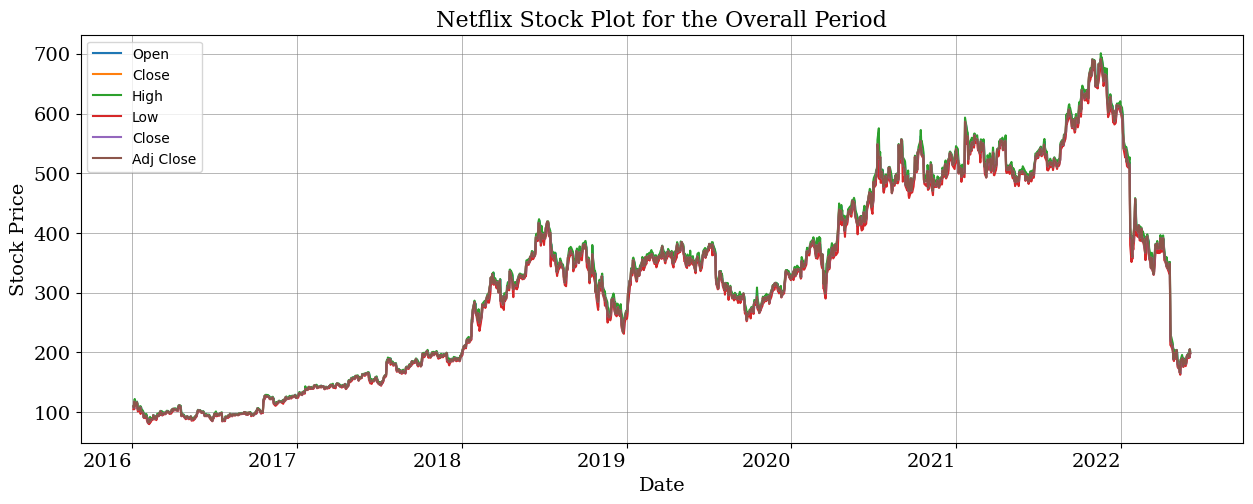

In [ ]:
df[['Open', 'Close', 'High', 'Low', 'Close', 'Adj Close']].plot(figsize = (15, 6))
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Date", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif', fontsize = 14, rotation = 0)
plt.ylabel("Stock Price", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif', fontsize = 14)
plt.title("Netflix Stock Plot for the Overall Period", fontname = 'serif', fontsize = 16)
plt.show()

**Top-5 Dates with the Highest Stock Price**

In [ ]:
a = df.sort_values(by = 'High', ascending = False).head(5)
a['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

**Top-5 Dates with the Lowest Stock Price**

In [ ]:
b = df.sort_values(by = 'Low', ascending = True).head(5)
b['Low']

Date
2016-02-08    79.949997
2016-02-09    81.550003
2016-02-05    81.860001
2016-02-11    82.910004
2016-07-19    84.500000
Name: Low, dtype: float64

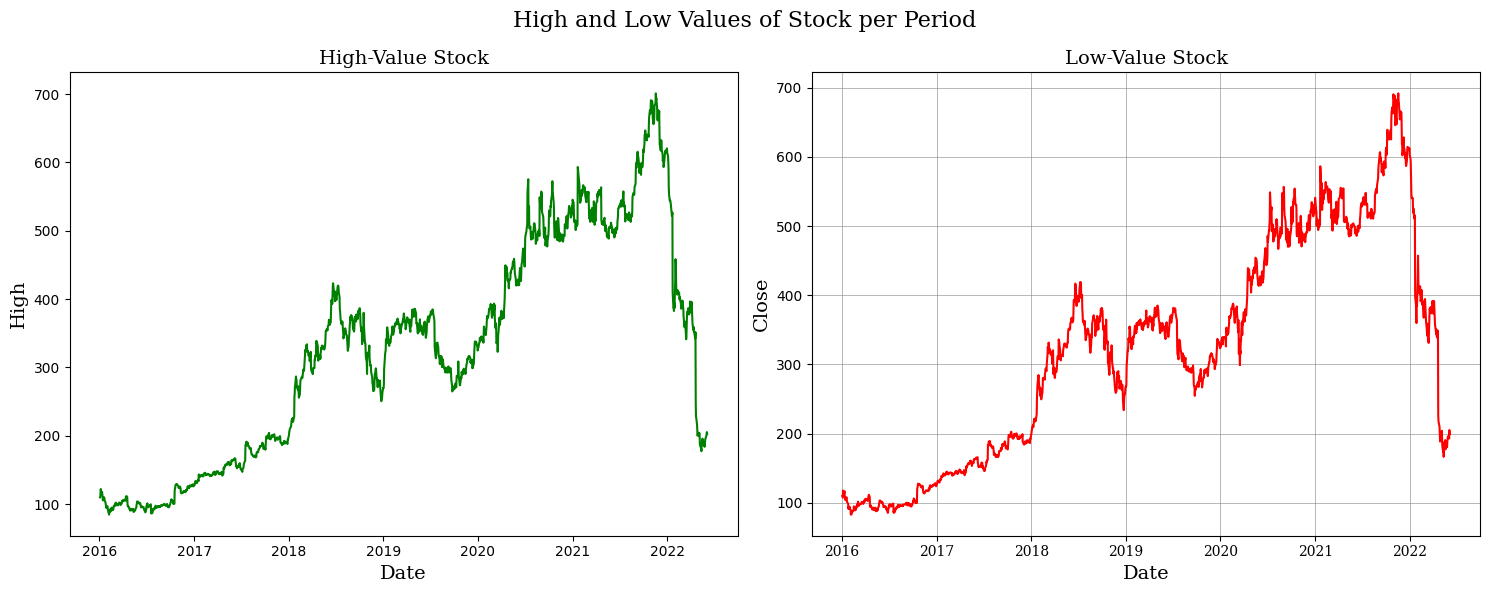

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = True, figsize = (15, 6))
plt.grid(True, color = "grey", linewidth = "0.4")
axes[0].set_xlabel('Date', fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
axes[0].set_ylabel('High', fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
axes[1].set_xlabel('Date', fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
axes[1].set_ylabel('Close', fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
fig.suptitle('High and Low Values of Stock per Period', fontname = 'serif', fontsize = 16)
sns.lineplot(ax = axes[0], y = df['High'], x = df.index, color = 'green')
axes[0].set_title('High-Value Stock', fontname = 'serif', fontsize = 14)
sns.lineplot(ax = axes[1], y = df['Close'], x = df.index, color = 'red')
axes[1].set_title('Low-Value Stock', fontname = 'serif', fontsize = 14)
plt.tight_layout()
plt.show()

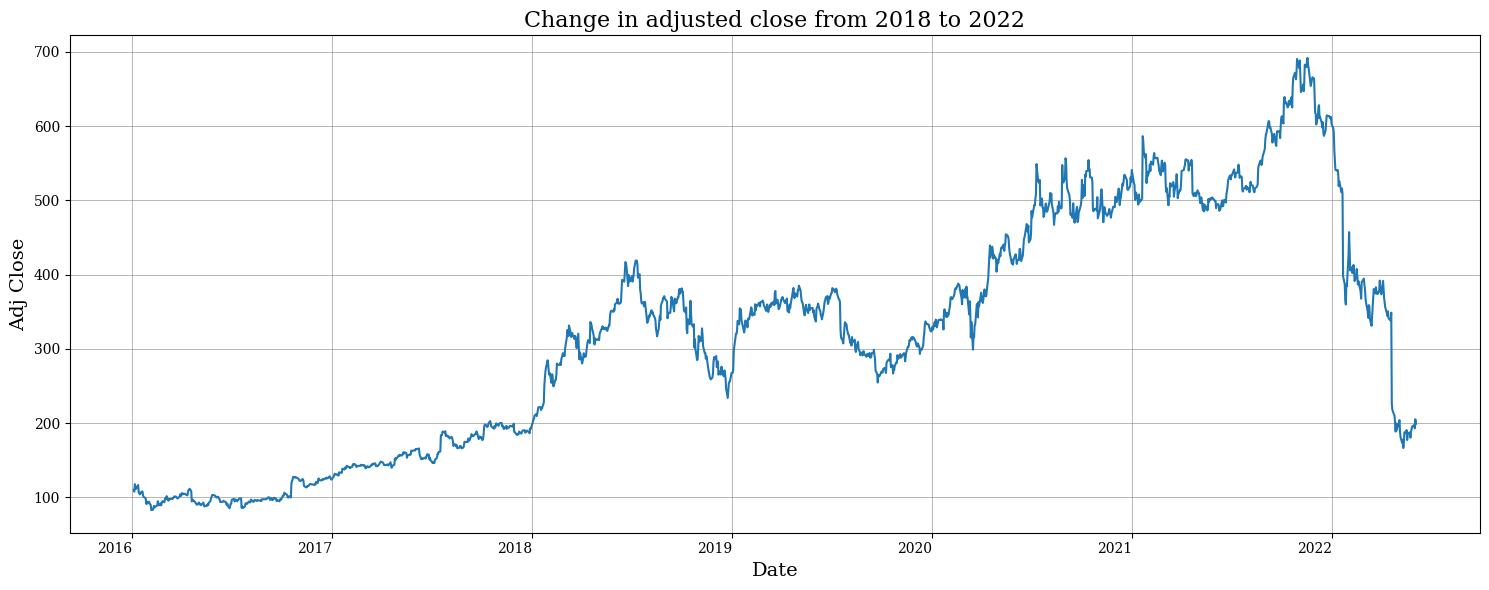

In [ ]:
plt.figure(figsize = (15, 6))
df['Adj Close'].plot()
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel('Date', fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif', rotation = 0)
plt.ylabel('Adj Close', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Change in adjusted close from 2018 to 2022', fontname = 'serif', fontsize = 16)
plt.tight_layout()
plt.show()

**Netflix Stock Daily Returns**

In [ ]:
df['Daily_returns'] = df['Adj Close'].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily_returns
Date,,,,,,,
2016-01-04,109.000000,110.000000,105.209999,109.959999,109.959999,20794800,NaN
2016-01-05,110.449997,110.580002,105.849998,107.660004,107.660004,17664600,-0.020917
2016-01-06,105.290001,117.910004,104.959999,117.680000,117.680000,33045700,0.093071
2016-01-07,116.360001,122.180000,112.290001,114.559998,114.559998,33636700,-0.026513
2016-01-08,116.330002,117.720001,111.099998,111.389999,111.389999,18067100,-0.027671


**Best Day of Stock**

In [ ]:
df[df['Daily_returns'] == df['Daily_returns'].max()]['Daily_returns']

Date
2016-10-18    0.190281
Name: Daily_returns, dtype: float64

**Worst Day of Stock**

In [ ]:
df[df['Daily_returns'] == df['Daily_returns'].min()]['Daily_returns']

Date
2022-04-20   -0.351166
Name: Daily_returns, dtype: float64

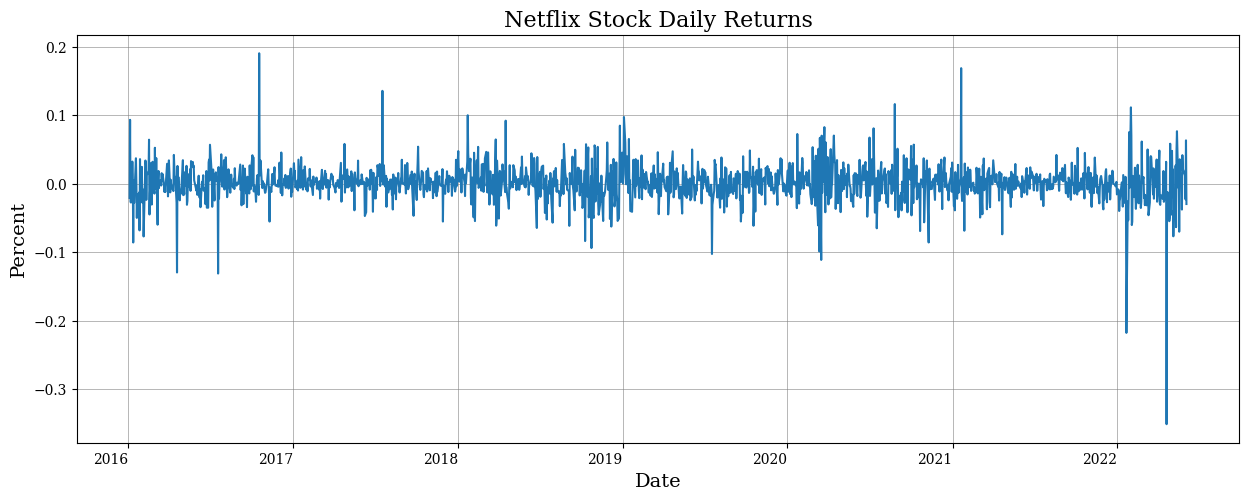

In [ ]:
plt.figure(figsize = (15, 6))
df['Daily_returns'].plot()
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Date", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif', rotation = 0)
plt.ylabel("Percent", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title("Netflix Stock Daily Returns", fontname = 'serif', fontsize = 16)
plt.show()

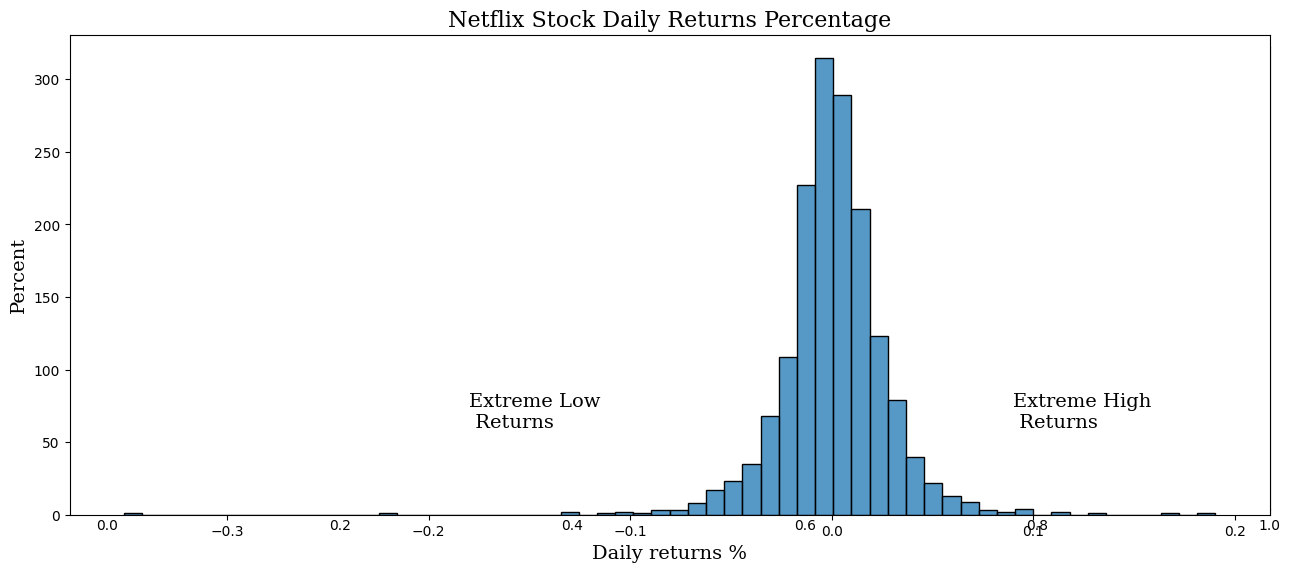

In [ ]:
fig = plt.figure(figsize = (15, 6))
plt.grid(True, color = "grey", linewidth = "0.4")
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.histplot(data = df['Daily_returns'], bins = 60)
ax1.set_xlabel("Daily returns %", fontname = 'serif', fontsize = 14)
ax1.set_ylabel("Percent", fontname = 'serif', fontsize = 14)
ax1.set_title("Netflix Stock Daily Returns Percentage", fontname = 'serif', fontsize = 16)
ax1.text(-0.18, 60, "Extreme Low\n Returns", fontname = 'serif', fontsize = 14)
ax1.text(0.09, 60, "Extreme High\n Returns", fontname = 'serif', fontsize = 14)
plt.show()

**Moving Average of Stock**

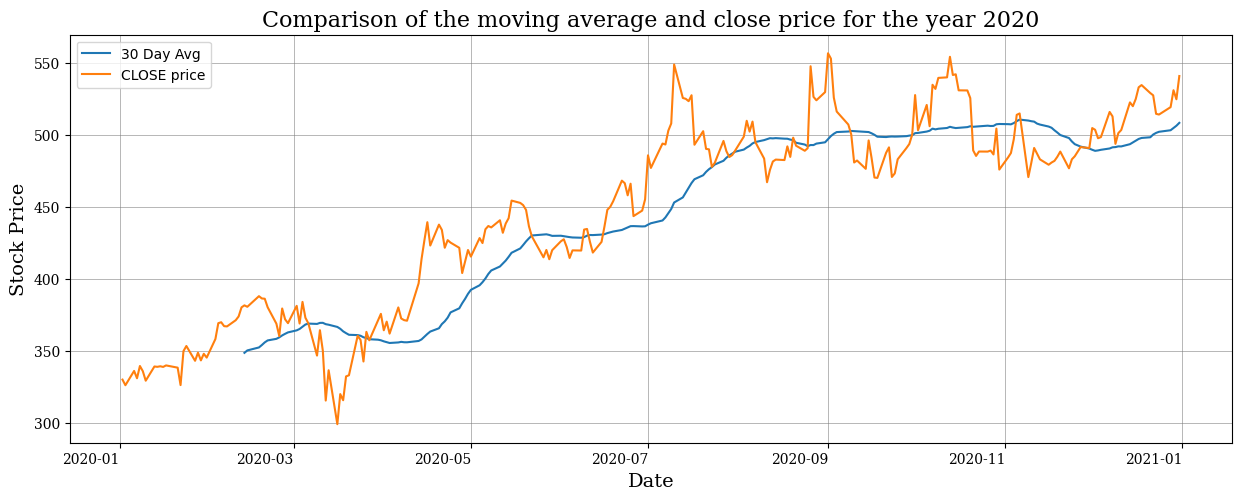

In [ ]:
f = plt.figure(figsize = (15, 6))
df['Close'].loc['2020-01-01': '2020-12-31'].rolling(window = 30).mean().plot(label = '30 Day Avg')
df['Close'].loc['2020-01-01':'2020-12-31'].plot(label = 'CLOSE price')
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel("Date", fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif', rotation = 0)
plt.ylabel("Stock Price", fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title("Comparison of the moving average and close price for the year 2020", fontname = 'serif', fontsize = 16)
plt.legend()
plt.show()

In [ ]:
# Preprocess the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create the training and testing datasets
X_train = []
y_train = []
for i in range(60, len(data_scaled)):
    X_train.append(data_scaled[i-60:i])
    y_train.append(data_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# Train the model
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

# Make predictions
X_test = data_scaled[-60:]
X_test = np.expand_dims(X_test, axis = 0)
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
print('Predicted price: ', predicted_price)

Epoch 1/50
49/49 [==============================] - 7s 54ms/step - loss: 0.0374
Epoch 2/50
49/49 [==============================] - 3s 69ms/step - loss: 0.0017
Epoch 3/50
49/49 [==============================] - 4s 82ms/step - loss: 0.0014
Epoch 4/50
49/49 [==============================] - 3s 58ms/step - loss: 0.0014
Epoch 5/50
49/49 [==============================] - 3s 53ms/step - loss: 0.0014
Epoch 6/50
49/49 [==============================] - 3s 54ms/step - loss: 0.0013
Epoch 7/50
49/49 [==============================] - 4s 75ms/step - loss: 0.0012
Epoch 8/50
49/49 [==============================] - 4s 79ms/step - loss: 0.0011
Epoch 9/50
49/49 [==============================] - 3s 53ms/step - loss: 0.0011
Epoch 10/50
49/49 [==============================] - 3s 52ms/step - loss: 0.0010
Epoch 11/50
49/49 [==============================] - 3s 53ms/step - loss: 0.0010
Epoch 12/50
49/49 [==============================] - 3s 70ms/step - loss: 9.6679e-04
Epoch 13/50
49/49 [==============